# Lethal Company v50 - Profitability Report

In [1]:
import random
import numpy as np
import pandas as pd

### Interactive tables

Effortlessly view, navigate, sort, and filter data. Create charts and access essential data insights, including descriptive statistics and missing values – all without writing a single line of code.

In [2]:
# Defining data for the dataframe
df = pd.read_csv('moons.csv')
df['Mean Loot'] = (df['Min Scrap'].astype(int) + df['Max Scrap'].astype(int)) / 2

### Visualization in DataSpell

Create graphs and visualizations that match your chosen color scheme.

In [3]:
import math


# Number of attempts
def select_random_items(data, random_items_n):
    spawn_chances = data['Spawn Chance'].str.replace('%', '').astype(float) / 100
    items = data['Item'].values
    random_items_n = math.floor(random_items_n)
    selected_items = random.choices(items, weights=spawn_chances, k=random_items_n)
    return selected_items

# Function to calculate the total based on average price of selected items
def calculate_total(data, selected_items):
    avg_prices = data.set_index('Item')['Average Value (c)'].astype(str).str.replace(' ▮', '').astype(float)
    total = sum(avg_prices.loc[item] for item in selected_items)
    return total

# Function to run the simulation 100 times and calculate the average total
def run_simulation(data, random_items_n, num_runs=100):
    totals = []
    for _ in range(num_runs):
        selected_items = select_random_items(data, random_items_n)
        total = calculate_total(data, selected_items)
        totals.append(total)
    avg_total = sum(totals) / num_runs
    return avg_total

In [4]:
results = []

for _, moon in df.iterrows():
    moon_name = moon['Name'] + '.csv'
    moon_mean_items = moon['Mean Loot']
    item_data = pd.read_csv(moon_name)
    avg_total = run_simulation(item_data, moon_mean_items)
    result = pd.DataFrame({'Moon': [moon['Name']], 'Average Total (cents)': [avg_total]})
    results.append(result)

combined_results = pd.concat(results, ignore_index=True)

In [5]:
moons = df.join(combined_results.set_index('Moon'), on='Name')
moons['Average Total minus Cost'] = moons['Average Total (cents)'] - moons['Cost'].astype(float)
moons

,Name,Difficulty,Cost,Default Layout,Map Size Multiplier,Min Scrap,Max Scrap,Max Indoor Power,Max Outdoor Power,Mean Loot,Average Total (cents),Average Total minus Cost
0,41-Experimentation,Easy,0,The Factory,1.00,8,11,4,8,9.5,278.07,278.07
1,220-Assurance,Easy,0,The Factory,1.00,13,15,6,8,14.0,519.72,519.72
2,56-Vow,Easy,0,The Factory,1.15,12,14,7,6,13.0,492.90,492.90
3,21-Offense,Intermediate,0,The Factory,1.25,14,17,12,8,15.5,547.46,547.46
4,61-March,Intermediate,0,The Factory,2.00,13,16,14,12,14.5,541.38,541.38
5,20-Adamance,Intermediate,0,The Factory,1.18,16,18,13,13,17.0,651.79,651.79
6,85-Rend,Hard,550,The Manor,1.80,18,25,10,6,21.5,1217.75,667.75
7,7-Dine,Hard,600,The Manor,1.80,22,25,16,6,23.5,1275.17,675.17
8,8-Titan,Hard,700,The Factory,2.20,28,31,18,7,29.5,1451.72,751.72
9,68-Artifice,Hard,1500,The Manor,1.60,31,37,13,13,34.0,2003.67,503.67


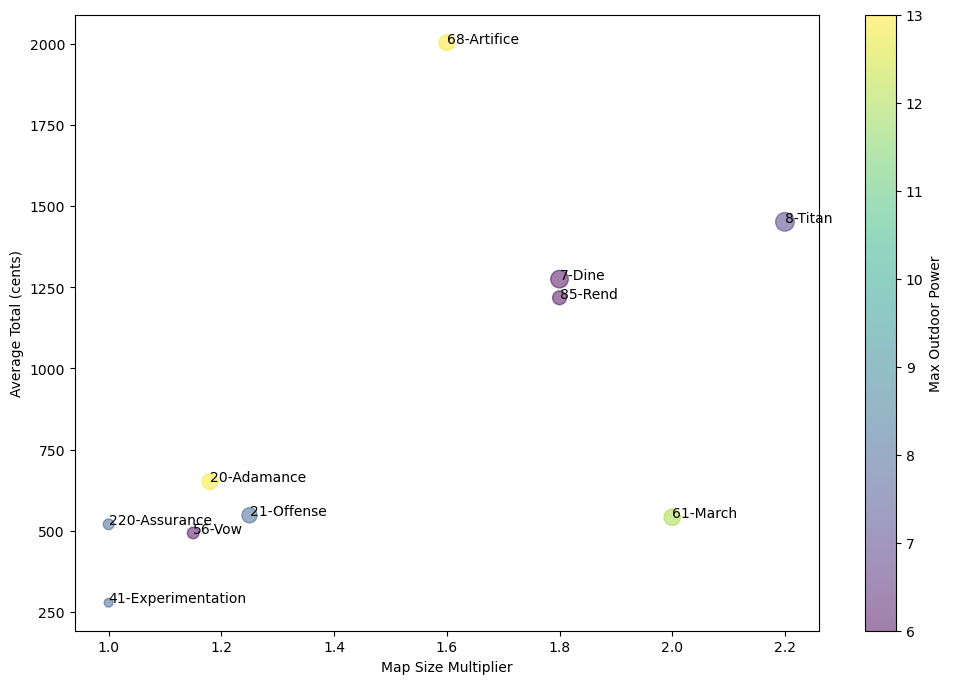

In [6]:
import matplotlib.pyplot as plt
# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(moons['Map Size Multiplier'], moons['Average Total (cents)'], c=moons['Max Outdoor Power'], s=moons['Max Indoor Power'] * 10, alpha=0.5, cmap='viridis')
plt.colorbar(scatter, label='Max Outdoor Power')
plt.xlabel('Map Size Multiplier')
plt.ylabel('Average Total (cents)')

# Add text labels for each data point
for i, name in enumerate(moons['Name']):
    ax.annotate(name, (moons['Map Size Multiplier'].iloc[i], moons['Average Total (cents)'].iloc[i]))

plt.show()

In [7]:
# Convert relevant columns to numeric
moons[['Map Size Multiplier', 'Max Indoor Power', 'Max Outdoor Power', 'Average Total (cents)']] = moons[['Map Size Multiplier', 'Max Indoor Power', 'Max Outdoor Power', 'Average Total (cents)']].apply(pd.to_numeric, errors='coerce')

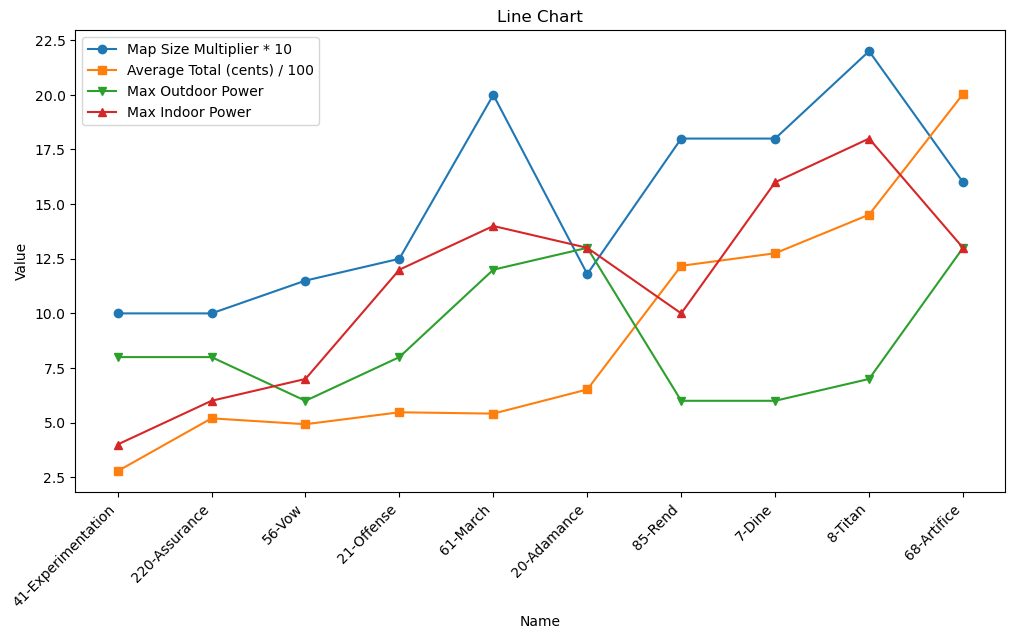

In [8]:
# Create the line chart
fig, ax = plt.subplots(figsize=(12, 6))

# Map Size Multiplier
ax.plot(moons.index, moons['Map Size Multiplier'] * 10, marker='o', label='Map Size Multiplier * 10')

# Average Total (cents)
ax.plot(moons.index, moons['Average Total (cents)'] / 100, marker='s', label='Average Total (cents) / 100')

# Max Outdoor Power
ax.plot(moons.index, moons['Max Outdoor Power'], marker='v', label='Max Outdoor Power')

# Max Indoor Power
ax.plot(moons.index, moons['Max Indoor Power'], marker='^', label='Max Indoor Power')

ax.set_xticks(np.arange(len(moons)))
ax.set_xticklabels(moons['Name'], rotation=45, ha='right')
ax.set_xlabel('Name')
ax.set_ylabel('Value')
ax.set_title('Line Chart')
ax.legend()

plt.show()